# Pre-processing and Creating Training Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_cleaned = pd.read_csv(r'C:\Users\ashle\OneDrive\Documents\GitHub\Capstone-2\Diabetes_Class_Cleaned.csv', index_col=0)

In [3]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Chol/HDL ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    object 
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic BP      390 non-null    int64  
 10  Diastolic BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist/hip ratio  390 non-null    float64
 14  Diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB


In [4]:
diabetes_cleaned = pd.DataFrame(diabetes_cleaned.values.repeat(5, axis=0), columns=diabetes_cleaned.columns)

In [5]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cholesterol      1950 non-null   object
 1   Glucose          1950 non-null   object
 2   HDL Chol         1950 non-null   object
 3   Chol/HDL ratio   1950 non-null   object
 4   Age              1950 non-null   object
 5   Gender           1950 non-null   object
 6   Height           1950 non-null   object
 7   Weight           1950 non-null   object
 8   BMI              1950 non-null   object
 9   Systolic BP      1950 non-null   object
 10  Diastolic BP     1950 non-null   object
 11  waist            1950 non-null   object
 12  hip              1950 non-null   object
 13  Waist/hip ratio  1950 non-null   object
 14  Diabetes         1950 non-null   object
dtypes: object(15)
memory usage: 228.6+ KB


### Create dummy features:

In [6]:
diabetes_cleaned['Diabetes'].unique()

array(['No diabetes', 'Diabetes'], dtype=object)

In [7]:
diabetes_cleaned['Diabetes'].replace('Diabetes', 1, inplace=True)
diabetes_cleaned['Diabetes'].replace('No diabetes', 0, inplace=True)

In [8]:
diabetes_cleaned.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
2,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
3,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
4,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0


In [9]:
diabetes_cleaned = pd.get_dummies(diabetes_cleaned)

In [10]:
class_counts = diabetes_cleaned['Diabetes'].value_counts()
class_counts

0    1650
1     300
Name: Diabetes, dtype: int64

In [11]:
class_percentages = pd.Series([(x / diabetes_cleaned.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    84.615385
1    15.384615
dtype: float64

### Create train and test data:

In [12]:
y=diabetes_cleaned.pop('Diabetes')
X=diabetes_cleaned

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardize the data:

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Modeling

### Model 1: Decision Tree Entropy Model

In [15]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

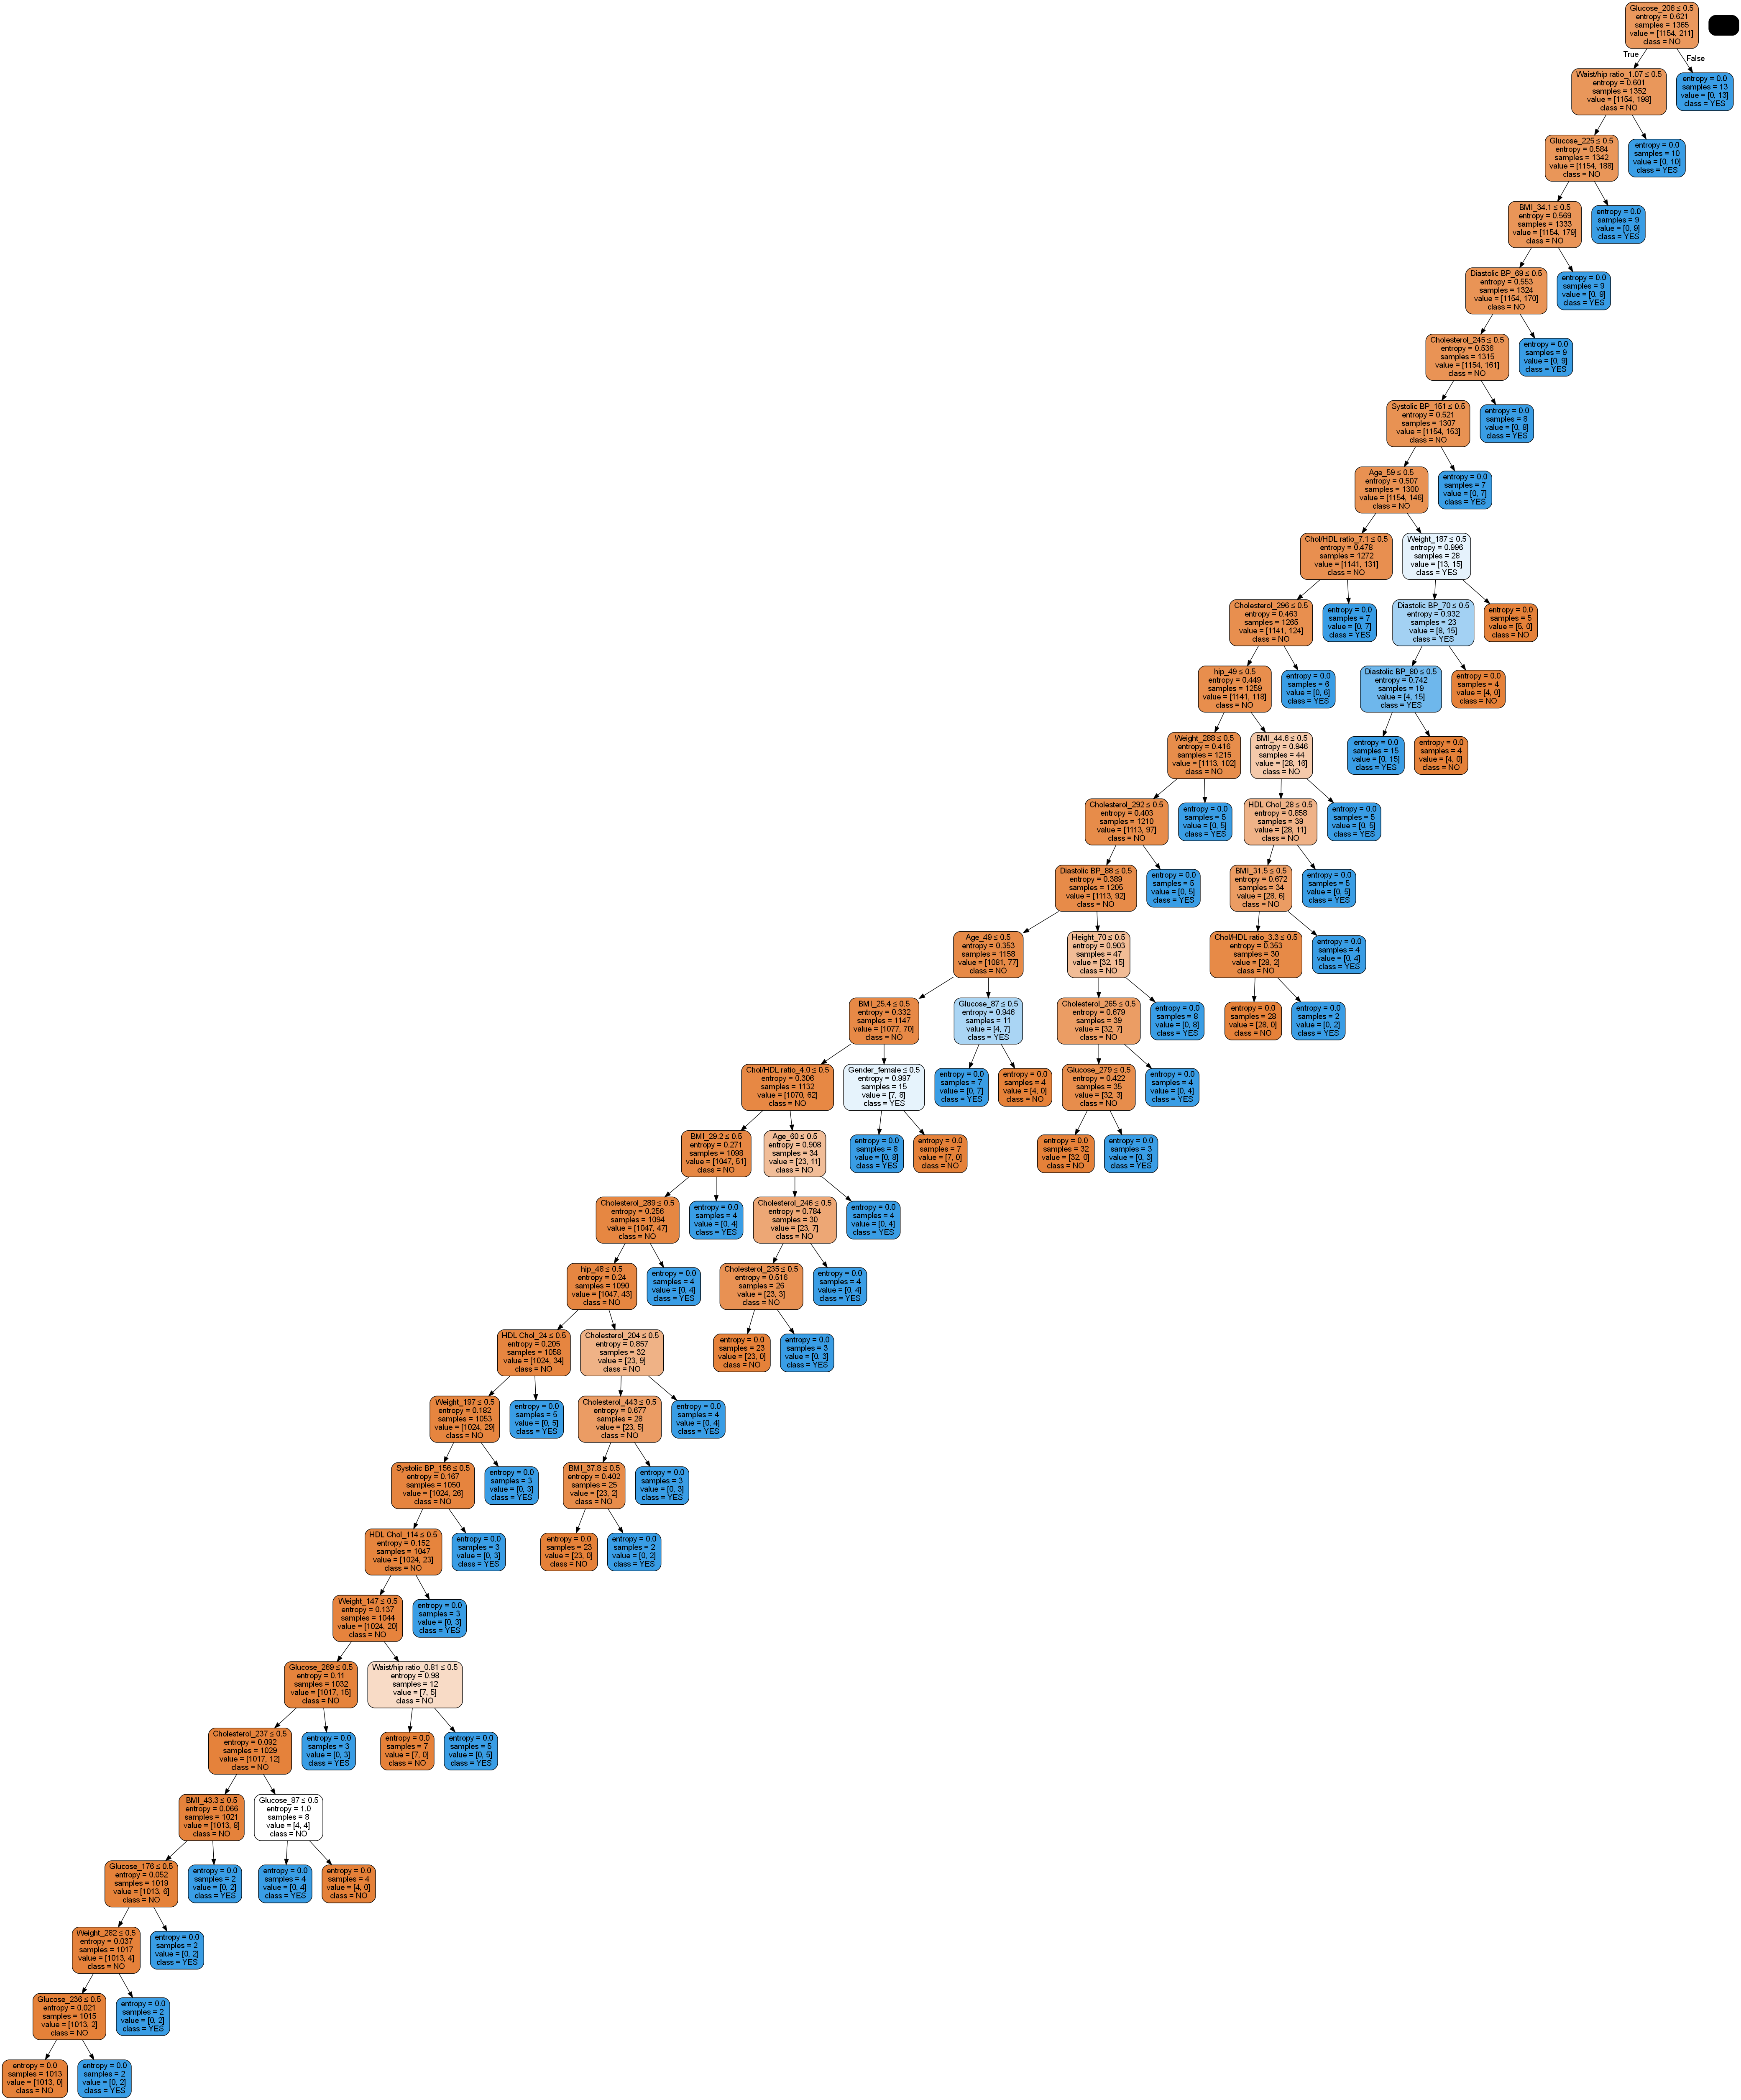

In [16]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
from sklearn.metrics import confusion_matrix

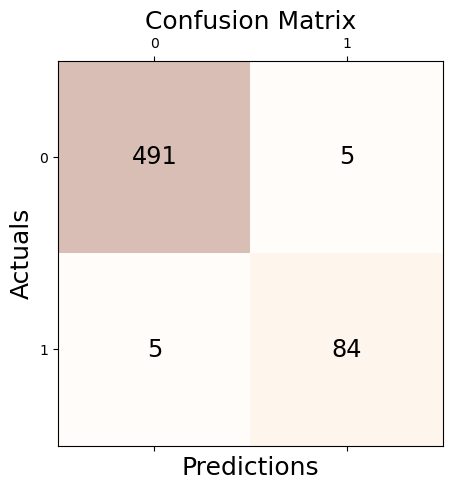

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Model 1 Stats:

In [19]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Model Entropy - no max depth
Accuracy: 0.9829059829059829
Precision: 0.9438202247191011
Recall: 0.9438202247191011
F1 Score: 0.9438202247191011


### Model 2: Logistic Regression Model

In [20]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = pd.Series(y_pred)
classifier

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

### Model 2 Stats:

In [21]:
print("Logistic Regression Model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Logistic Regression Model
Accuracy: 0.9914529914529915
Precision: 1.0
Recall: 0.9438202247191011
F1 Score: 0.9710982658959537


### Gradient Boosting Model

In [22]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred = pd.Series(y_pred)
gb

GradientBoostingClassifier()

### Model 3 Stats

In [23]:
print("Gradient Boosting Model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Gradient Boosting Model
Accuracy: 0.9128205128205128
Precision: 1.0
Recall: 0.42696629213483145
F1 Score: 0.5984251968503937


### Parameter tunning:

In [24]:
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [25]:
gridCV = GridSearchCV(LogisticRegression(), param_grid=params, cv=10)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [26]:
gridCV.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [27]:
gridCV.best_score_

0.9978048518677545

## Best Model:

GridSearchCV tells us that the logistic regression model with C = 10 and solver = newton-cg would be the best model.

In [28]:
best_model = LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 10)
best_model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = pd.Series(y_pred)
best_model

LogisticRegression(C=10, max_iter=500, solver='newton-cg')

In [29]:
print("Logisitic Regression with Newton-cg and C=10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Logisitic Regression with Newton-cg and C=10
Accuracy: 0.9914529914529915
Precision: 1.0
Recall: 0.9438202247191011
F1 Score: 0.9710982658959537


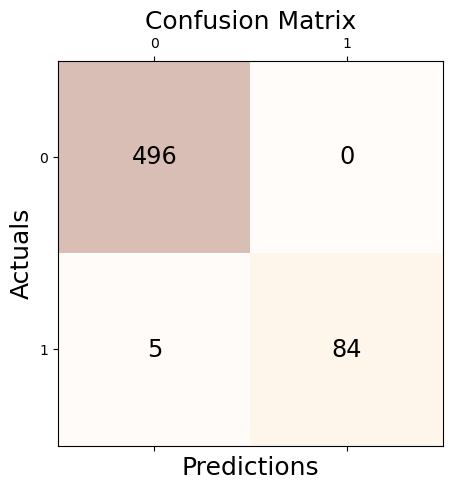

In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()